<a href="https://colab.research.google.com/github/R267/Marchenko-lab5/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

house_prices_advanced_regression_techniques_path = kagglehub.competition_download('house-prices-advanced-regression-techniques')

print('Data source import complete.')


100%|██████████| 199k/199k [00:00<00:00, 28.6MB/s]

Extracting files...
Data source import complete.


# House Prices: Analysis, Data Visualization and Regression

In this work I will show you a deep analysis and data visualization of the dataset "House Prices" provided for kaggle in: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

# 1. Introduction

The idea of this dataset is to provide us a serie of features wich have as a target value the cost of a house.

# 2. Let's Start

First of all we need to load some libaries which are going to help us to analyze and visualize the data.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR



%matplotlib inline

After load libraries, we need to read and display the data frame.

In [6]:
prices = pd.read_csv('/content/train.csv')
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As we can see, there are different kind of values. For example: <b><i>MSSubClass</i></b> is a <i>int</i> value, <b><i>MSZoning</i></b> is a <i>object</i> value and <b><i>LotFrontage</i></b> is a <i>float</i> value. For differnt
reasons we must not to work with data in this format, we need to handle it to an apropiate format in order to apply
differnt algorithms of machine learning which work with discrete values not continuos. Now let's show information about the data frame.

In [7]:
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
prices.select_dtypes(include=['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


As we can see, the are 43 columns or features which are category type.

# 3. Analyzing Data

Now that we know that at least the middle of the features are category type, we need to analyze if those
data have null values and solve it. So first we need to extract just the features
of <i>object</i> type making a copy from the original.

In [9]:
# prices = all features except those with object type value
# prices_objects = all features with object type value
prices_objects = prices.select_dtypes(include=['object']).copy()
prices = prices.select_dtypes(exclude=['object']).copy()
prices_objects.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Now, let's see how many values are <i>NAN</i> in <b><i>prices</i></b> and <b><i>prices_object</i></b>

In [11]:
prices = prices.drop(['Id'],axis=1)
prices.isnull().sum()

,0
MSSubClass,0
LotFrontage,259
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0
BsmtFinSF2,0


We can see that featues as <b><i>LotFrontag</i></b> and <b><i>GarageYrBlt</i></b> have some null values, in the next section we will solve this problem. Meanwhile, let's see what is happening with the <b><i>prices_object</i></b> dataset.

In [12]:
prices_objects.isnull().sum()

,0
MSZoning,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0


We have seen that the features: <b><i>Alley</i>, <b><i>MasVnrType</i></b>, <i>BsmtQual</i>, <i>BsmtCond</i>, <i>BsmtExposure</i>, <i>BsmtFinType1</i>, <i>BsmtFinType2</i>, <i>Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature</i></b>; have <i>NaN</i> values.

## 3.1 Solving the problem with NaN values

First we will focus on the dataset <i><b>prices_objects</b></i>. To solve the problem, first of all we need to know how many NaN values are for each feature as showed above.
So as we know, the first feature <i><b>Alley</b></i> has 1369 NaN values of 1460, this represent the 93% of all data,  the same case apply for features like: <i><b>PoolQC, Fence, MiscFeature</b></i> which represent 99%, 80% and 96% of all data. So based on this information we proceed to drop all of this features.

In [13]:
# Dropping not necessary features
prices_objects = prices_objects.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1)

Now that we have dropped some features that we do not need, we will to proceed fixing the rest of features which are:
<html>
<head>
</head>
<body>

<table>
  <tr>
    <th>Feature</th>
    <th>Number of Nan</th>
  </tr>
  <tr>
    <td>BsmtQual</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtCond</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtExposure</td>
    <td>38</td>
  </tr>
  <tr>
    <td>BsmtFinType1</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtFinType2</td>
    <td>38</td>
  </tr>
  <tr>
    <td>Electrical</td>
    <td>1</td>
  </tr>
  <tr>
    <td>FireplaceQu</td>
    <td>690</td>
  </tr>
  <tr>
    <td>GarageType</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageFinish</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageQual</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageCond</td>
    <td>81</td>
  </tr>
  <tr>
    <td>MasVnrType</td>
    <td>8</td>
  </tr>
</table>
</body>
</html>

There are many ways in how to handle NaN values. In this case we just are goint to use the top category in each feature. So we will break down the first two features <i><b> BsmtQual</b></i> and <i><b>BsmtCond</b></i> and then apply the same for the rest of features.
So let's start with the <i><b> BsmtQual</b></i> feature.

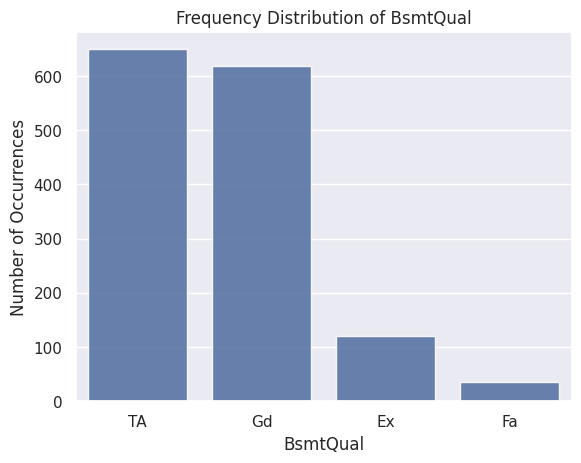

In [17]:
BsmtQual_count = prices_objects['BsmtQual'].value_counts()
sb.set(style="darkgrid")
sb.barplot(x=BsmtQual_count.index, y=BsmtQual_count.values, alpha=0.9)
plt.title('Frequency Distribution of BsmtQual')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BsmtQual', fontsize=12)
plt.show()

We have seen that the category <i>TA</i> is the top one. So we are going to supply the Nan values with this feature.

In [18]:
prices_objects['BsmtQual'] = prices_objects['BsmtQual'].fillna(prices_objects['BsmtQual'].value_counts().index[0])

Now let's analyze the <i><b>BsmtCond</b></i> feature:

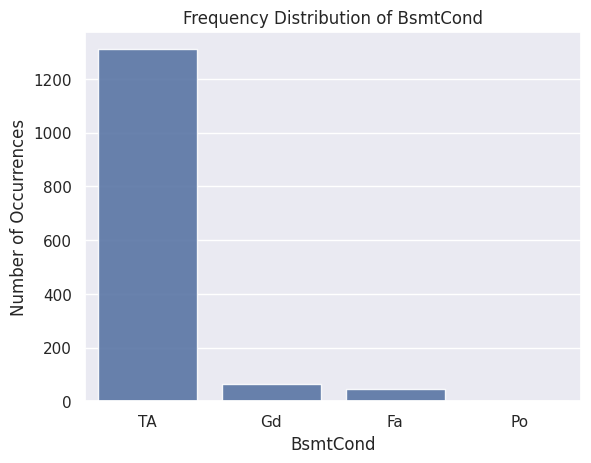

In [20]:
BsmtCond_count = prices_objects['BsmtCond'].value_counts()
sb.set(style="darkgrid")
sb.barplot(x=BsmtCond_count.index, y=BsmtCond_count.values, alpha=0.9)
plt.title('Frequency Distribution of BsmtCond')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BsmtCond', fontsize=12)
plt.show()

We have seen that the category <i>TA</i> is the top one. So we are going to supply the Nan values with this feature.

In [21]:
prices_objects['BsmtCond'] = prices_objects['BsmtCond'].fillna(prices_objects['BsmtCond'].value_counts().index[0])

So now we will apply the same methodology with the rest of featues.

In [22]:
prices_objects['BsmtExposure'] = prices_objects['BsmtExposure'].fillna(
                                        prices_objects['BsmtExposure'].value_counts().index[0])
prices_objects['BsmtFinType1'] = prices_objects['BsmtFinType1'].fillna(
                                        prices_objects['BsmtFinType1'].value_counts().index[0])
prices_objects['BsmtFinType2'] = prices_objects['BsmtFinType2'].fillna(
                                        prices_objects['BsmtFinType2'].value_counts().index[0])
prices_objects['Electrical'] = prices_objects['Electrical'].fillna(
                                        prices_objects['Electrical'].value_counts().index[0])
prices_objects['FireplaceQu'] = prices_objects['FireplaceQu'].fillna(
                                        prices_objects['FireplaceQu'].value_counts().index[0])
prices_objects['GarageType'] = prices_objects['GarageType'].fillna(
                                        prices_objects['GarageType'].value_counts().index[0])
prices_objects['GarageFinish'] = prices_objects['GarageFinish'].fillna(
                                        prices_objects['GarageFinish'].value_counts().index[0])
prices_objects['GarageQual'] = prices_objects['GarageQual'].fillna(
                                        prices_objects['GarageQual'].value_counts().index[0])
prices_objects['GarageCond'] = prices_objects['GarageCond'].fillna(
                                        prices_objects['GarageCond'].value_counts().index[0])
prices_objects['MasVnrType'] = prices_objects['MasVnrType'].fillna(
                                        prices_objects['MasVnrType'].value_counts().index[0])

Reviewing again the data frame, we will see that there is any null value.

In [23]:
prices_objects.isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


Now let's fix the <i>Nan</i> values from <b>prices</b> dataset. We will proceed with the same technique as with the <b>prices_objects</b>.

In [24]:
prices['LotFrontage'] = prices['LotFrontage'].fillna(prices['LotFrontage'].value_counts().index[0])
prices['MasVnrArea'] = prices['MasVnrArea'].fillna(prices['MasVnrArea'].value_counts().index[0])
prices['GarageYrBlt'] = prices['GarageYrBlt'].fillna(prices['GarageYrBlt'].value_counts().index[0])

In [25]:
prices.isnull().sum()

,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0
BsmtFinSF2,0


Now let's see how is the distribution of each category for some features. In the first case we will analyze the object variable <i>MSZoning</i>.

In [26]:
# To show the count of every category in MSZoning column
print(prices_objects['MSZoning'].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


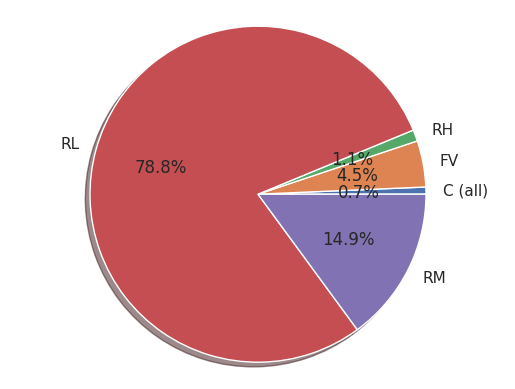

In [27]:
labels = prices_objects['MSZoning'].astype('category').cat.categories.tolist()
counts = prices_objects['MSZoning'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

Now we will analyze the distribution of categories in the variable <i>Exterior2nd</i>.

In [28]:
# To show the count of every category in MSZoning column
print(prices_objects['Exterior2nd'].value_counts())

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


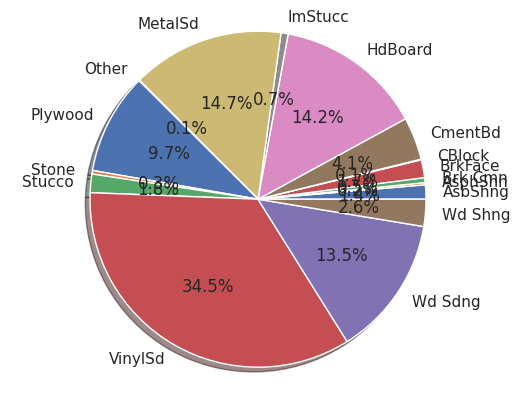

In [29]:
labels = prices_objects['Exterior2nd'].astype('category').cat.categories.tolist()
counts = prices_objects['Exterior2nd'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

## 3.2 Fixing the problem wiht categorical features

We will use Backward Difference Encoder technique.

In [30]:
encoder = ce.BackwardDifferenceEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle',
            'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])

In [31]:
prices_objects_BackDiffEnc = encoder.fit_transform(prices_objects)
prices_objects_BackDiffEnc.head()

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,-0.5,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,-0.5,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,-0.5,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


## 3.3 Scaling data

In [32]:
Ytrain = prices.SalePrice
prices = prices.drop(['SalePrice'], axis=1)
prices_corpus = pd.concat([prices, prices_objects_BackDiffEnc], axis=1)

In [33]:
prices_corpus.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [34]:
min_max_scaler = preprocessing.MinMaxScaler()

In [35]:
X = pd.DataFrame(min_max_scaler.fit_transform(prices_corpus), columns = prices_corpus.columns)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing test set

In [36]:
prices_test = pd.read_csv('/content/test.csv')
prices_objects_test = prices_test.select_dtypes(include=['object']).copy()
prices_test = prices_test.select_dtypes(exclude=['object']).copy()
prices_test = prices_test.drop(['Id'],axis=1)
prices_objects_test = prices_objects_test.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1)

prices_objects_test['MSZoning'] = prices_objects_test['MSZoning'].fillna(
                                        prices_objects_test['MSZoning'].value_counts().index[0])
prices_objects_test['Utilities'] = prices_objects_test['Utilities'].fillna(
                                        prices_objects_test['Utilities'].value_counts().index[0])
prices_objects_test['Exterior1st'] = prices_objects_test['Exterior1st'].fillna(
                                        prices_objects_test['Exterior1st'].value_counts().index[0])
prices_objects_test['Exterior2nd'] = prices_objects_test['Exterior2nd'].fillna(
                                        prices_objects_test['Exterior2nd'].value_counts().index[0])
prices_objects_test['BsmtCond'] = prices_objects_test['BsmtCond'].fillna(
                                        prices_objects_test['BsmtCond'].value_counts().index[0])
prices_objects_test['KitchenQual'] = prices_objects_test['KitchenQual'].fillna(
                                        prices_objects_test['KitchenQual'].value_counts().index[0])
prices_objects_test['Functional'] = prices_objects_test['Functional'].fillna(
                                        prices_objects_test['Functional'].value_counts().index[0])
prices_objects_test['SaleType'] = prices_objects_test['SaleType'].fillna(
                                        prices_objects_test['SaleType'].value_counts().index[0])
prices_objects_test['BsmtQual'] = prices_objects_test['BsmtQual'].fillna(
                                        prices_objects_test['BsmtQual'].value_counts().index[0])
prices_objects_test['BsmtExposure'] = prices_objects_test['BsmtExposure'].fillna(
                                        prices_objects_test['BsmtExposure'].value_counts().index[0])
prices_objects_test['BsmtFinType1'] = prices_objects_test['BsmtFinType1'].fillna(
                                        prices_objects_test['BsmtFinType1'].value_counts().index[0])
prices_objects_test['BsmtFinType2'] = prices_objects_test['BsmtFinType2'].fillna(
                                        prices_objects_test['BsmtFinType2'].value_counts().index[0])
prices_objects_test['Electrical'] = prices_objects_test['Electrical'].fillna(
                                        prices_objects_test['Electrical'].value_counts().index[0])
prices_objects_test['FireplaceQu'] = prices_objects_test['FireplaceQu'].fillna(
                                        prices_objects_test['FireplaceQu'].value_counts().index[0])
prices_objects_test['GarageType'] = prices_objects_test['GarageType'].fillna(
                                        prices_objects_test['GarageType'].value_counts().index[0])
prices_objects_test['GarageFinish'] = prices_objects_test['GarageFinish'].fillna(
                                        prices_objects_test['GarageFinish'].value_counts().index[0])
prices_objects_test['GarageQual'] = prices_objects_test['GarageQual'].fillna(
                                        prices_objects_test['GarageQual'].value_counts().index[0])
prices_objects_test['GarageCond'] = prices_objects_test['GarageCond'].fillna(
                                        prices_objects_test['GarageCond'].value_counts().index[0])
prices_objects_test['MasVnrType'] = prices_objects_test['MasVnrType'].fillna(
                                        prices_objects_test['MasVnrType'].value_counts().index[0])


prices_test['LotFrontage'] = prices_test['LotFrontage'].fillna(prices_test['LotFrontage'].value_counts().index[0])
prices_test['MasVnrArea'] = prices_test['MasVnrArea'].fillna(prices_test['MasVnrArea'].value_counts().index[0])
prices_test['GarageYrBlt'] = prices_test['GarageYrBlt'].fillna(prices_test['GarageYrBlt'].value_counts().index[0])
prices_test['BsmtFinSF1'] = prices_test['BsmtFinSF1'].fillna(prices_test['BsmtFinSF1'].value_counts().index[0])
prices_test['BsmtFinSF2'] = prices_test['BsmtFinSF2'].fillna(prices_test['BsmtFinSF2'].value_counts().index[0])
prices_test['BsmtUnfSF'] = prices_test['BsmtUnfSF'].fillna(prices_test['BsmtUnfSF'].value_counts().index[0])
prices_test['TotalBsmtSF'] = prices_test['TotalBsmtSF'].fillna(prices_test['TotalBsmtSF'].value_counts().index[0])
prices_test['BsmtFullBath'] = prices_test['BsmtFullBath'].fillna(prices_test['BsmtFullBath'].value_counts().index[0])
prices_test['BsmtHalfBath'] = prices_test['BsmtHalfBath'].fillna(prices_test['BsmtHalfBath'].value_counts().index[0])
prices_test['GarageCars'] = prices_test['GarageCars'].fillna(prices_test['GarageCars'].value_counts().index[0])
prices_test['GarageArea'] = prices_test['GarageArea'].fillna(prices_test['GarageArea'].value_counts().index[0])

In [37]:
prices_objects_BackDiffEnc_test = encoder.fit_transform(prices_objects_test)
prices_corpus_test = pd.concat([prices_test, prices_objects_BackDiffEnc_test], axis=1)

Xtest = pd.DataFrame(min_max_scaler.fit_transform(prices_corpus_test), columns = prices_corpus_test.columns)

## 4. Dimensionality Reduction

In [38]:
pca = PCA()
pca.fit(X)

PCA()

Text(0, 0.5, 'Variance Ratio')

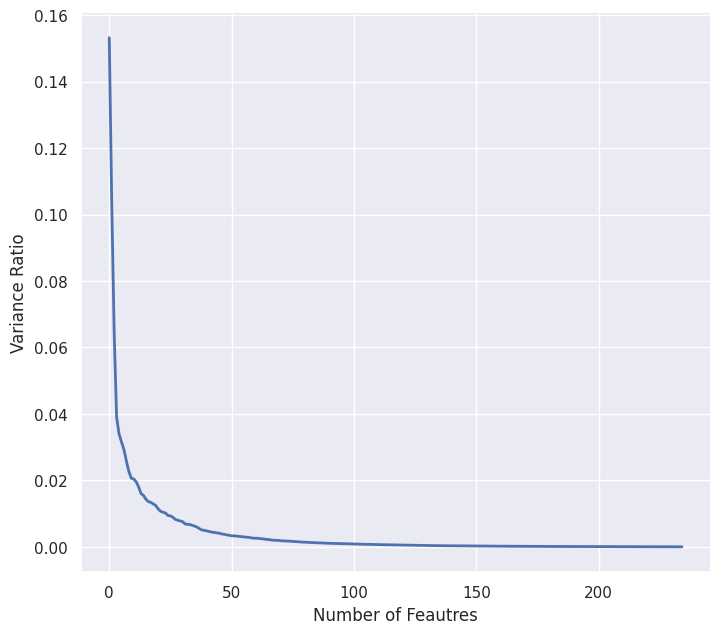

In [39]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

In [40]:
pca = PCA(n_components=10)

In [41]:
pca.fit(X)

PCA(n_components=10)

In [42]:
Xtrain_pca = pca.transform(X)
pca.fit(Xtest)

PCA(n_components=10)

In [43]:
Xtest_pca = pca.transform(Xtest)

In [44]:
Ytrain = Ytrain.astype(float)

## 5. Support Vector Machine for Regression

In [45]:
clf = SVR(C=0.8, epsilon=0.2, kernel='poly')
#regr = RandomForestRegressor(max_depth=3)

In [46]:
clf.fit(Xtrain_pca, Ytrain)
#regr.fit(Xtrain_pca, Ytrain)

SVR(C=0.8, epsilon=0.2, kernel='poly')

In [47]:
Ypredict = clf.predict(Xtest_pca)
#Ypredict = regr.predict(Xtest_pca)

In [49]:
test = pd.read_csv('/content/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [50]:
Ypred = pd.DataFrame({'SalePrice':Ypredict})
prediction = pd.concat([test['Id'], Ypred], axis=1)

In [51]:
prediction = pd.concat([test['Id'], Ypred], axis=1)
prediction.head()

,Id,SalePrice
0,1461,163101.772686
1,1462,163116.408038
2,1463,163119.979682
3,1464,163133.829101
4,1465,163130.085220


In [55]:
prediction.to_csv('/content/predictions.csv', sep=',', index=False)